In [2]:
!pip install rpy2
!apt-get -y update && apt-get install -y  libudunits2-dev libgdal-dev libgeos-dev libproj-dev
!apt-get install -y libgdal1-dev libgeos-c1
!apt-get install -y libprotobuf-dev protobuf-compiler
!apt-get install -y libjq-dev

%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu

In [3]:
%%R 
install.packages('sf')
library(sf)

install.packages("rgeos")
install.packages("protolite")
install.packages("jqr")
install.packages("geojsonio")

install.packages("tmap")
library(tmap)

install.packages("mapview")
library(mapview)

library(tidyverse)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/proxy_0.4-27.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 74622 bytes (72 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



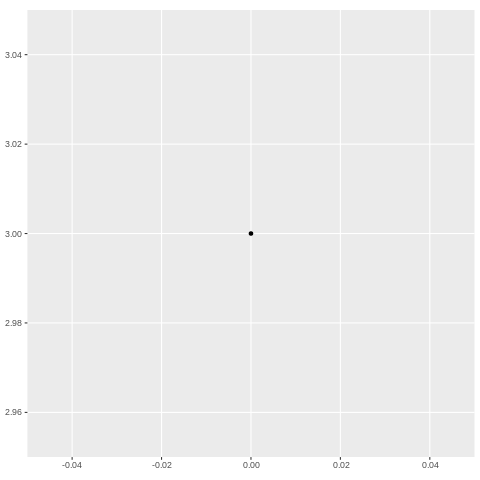

In [5]:
%%R

c(0,3) %>% 
  st_point() %>%
  ggplot() + 
  geom_sf()

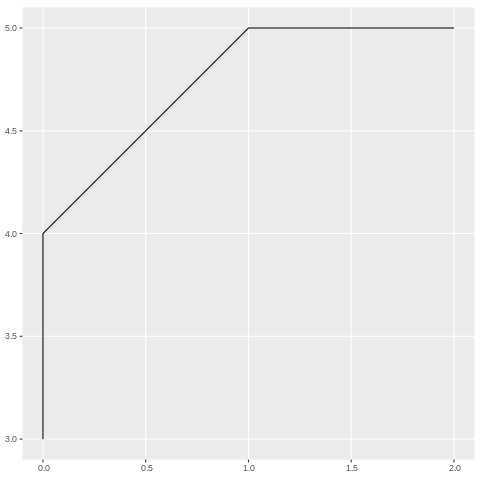

In [6]:
%%R
rbind(c(0,3),
      c(0,4),
      c(1,5),
      c(2,5)) %>%
  st_linestring() %>% 
  ggplot() + 
  geom_sf() 

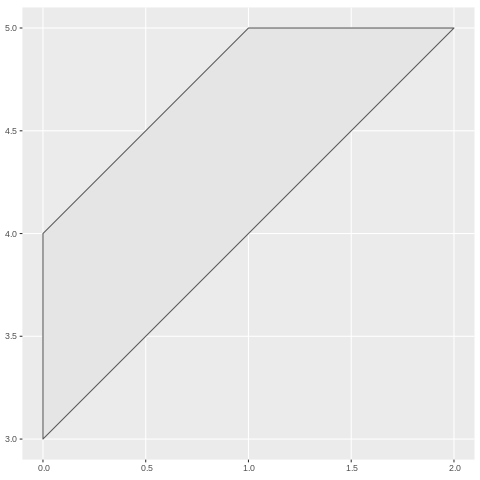

In [7]:
%%R
rbind(c(0,3),
      c(0,4),
      c(1,5),
      c(2,5),
      c(0,3)) %>%
  list() %>%    
  st_polygon() %>% 
  ggplot() + 
  geom_sf() 

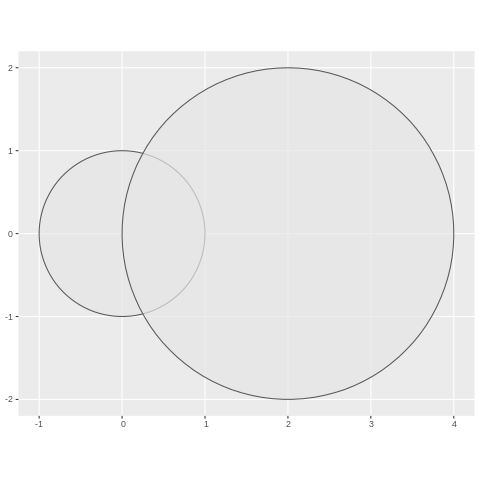

In [55]:
%%R
circle <- tibble(t = seq(0, 2*pi, l = 100)) %>%
  mutate(x = round(sin(t), 3)) %>%
  mutate(y = round(cos(t), 3)) %>% select(x, y) %>% as.matrix() %>%
  list() %>%    
  st_polygon()

ggplot() + 
  geom_sf(data = circle, alpha = 0.7) + 
  geom_sf(data = circle*2 + c(2, 0), alpha = 0.7)


In [84]:
%%R
circle %>% st_intersection(circle*2 + c(2, 0)) %>%
ggplot() + 
  geom_sf()

circle %>% st_intersection(circle*2 + c(1, 0)) %>% st_area()  

circle %>% st_intersection(circle*2 + c(1, 0)) %>% st_length() 

circle %>% st_intersection(circle*2 + c(1, 0)) %>% st_cast("LINESTRING") %>% st_length() 
#

[1] 6.282306


In [8]:
%%R 
system("wget --continue https://github.com/JacekPardyak/tb-data-science-talks/raw/master/2022-06-30/tb-logo/logo.dxf -O /tmp/logo.dxf")
logo = st_read("/tmp/logo.dxf") %>%
  select(geometry) %>% mutate(nrow = 1:n())

# (t)eam.blue
l1 <- logo %>% slice(1:44) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc() %>% st_sf(geometry = .)
l1
l1 %>% ggplot() +
  geom_sf()

# team.bl(u)e
l2 <- logo %>% slice(45:92) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l2
l2 %>% ggplot() +
  geom_sf()

# team.b(l)ue
l3 <- logo %>% slice(93:104) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l3
l3 %>% ggplot() +
  geom_sf()

# t(e)am.blue
l4 <- logo %>% slice(105:179) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

p1 <- logo %>% slice(180) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()
p2 <- logo %>% slice(195) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()

tmp <- p1[1,] %>% rbind(p2[2,]) %>% st_linestring() %>% st_sfc() %>% st_sf(geometry = .)

tmp <- logo %>% slice(180:195) %>% bind_rows(tmp) %>%
    select(geometry) %>% st_union() %>% st_polygonize() %>% 
    first() %>% 
    first() %>% st_sfc()  %>% st_sf(geometry = .)
  
l4 <- l4 %>% st_difference(tmp)
  
l4 %>% ggplot() +
    geom_sf()  

# team.blu(e)
l5 <- logo %>% slice(196:270) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l5 %>% ggplot() +
  geom_sf()

p1 <- logo %>% slice(271) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()
p2 <- logo %>% slice(286) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()

tmp <- p1[1,] %>% rbind(p2[2,]) %>% st_linestring() %>% st_sfc()  %>% st_sf(geometry = .)
tmp <- logo %>% slice(271:286) %>% bind_rows(tmp) %>%
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

l5 <- l5 %>% st_difference(tmp)

l5 %>% ggplot() +
  geom_sf()

# tea(m).blue
l6 <- logo %>% slice(287:379) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l6
l6 %>% ggplot() +
  geom_sf()

# team(.)blue
l7 <- logo %>% slice(380:412) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l7
l7 %>% ggplot() +
  geom_sf()

# te(a)m.blue
l8 <- logo %>% slice(413:474) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l8 %>% ggplot() +
  geom_sf()

tmp <- logo %>% slice(475:507) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

l8 <- l8 %>% st_difference(tmp)
l8 %>% ggplot() +
  geom_sf()

# team.(b)lue
l9 <- logo %>% slice(508:564) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

tmp <- logo %>% slice(565:597) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l9 <- l9 %>% st_difference(tmp)

l9 %>% ggplot() +
    geom_sf()
  
# write shape
data <- l1 %>% 
  bind_rows(l4) %>% 
  bind_rows(l8) %>%
  bind_rows(l6) %>%
  bind_rows(l7) %>%
  bind_rows(l9) %>%
  bind_rows(l3) %>%
  bind_rows(l2) %>%
  bind_rows(l5)

st_write(data, "/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/logo.shp", append=FALSE)

Reading layer `entities' from data source `/tmp/logo.dxf' using driver `DXF'
Simple feature collection with 597 features and 6 fields
Geometry type: LINESTRING
Dimension:     XY
Bounding box:  xmin: 15.8276 ymin: 12.72794 xmax: 292.4652 ymax: 61.2117
CRS:           NA
Deleting layer `logo' using driver `ESRI Shapefile'
Writing layer `logo' to data source 
  `/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/logo.shp' using driver `ESRI Shapefile'
Writing 9 features with 0 fields and geometry type Polygon.


In [9]:
%%R
data = st_read("/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/logo.shp") 
data

Reading layer `logo' from data source 
  `/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/logo.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 9 features and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 15.8276 ymin: 12.72794 xmax: 292.4652 ymax: 61.2117
CRS:           NA
Simple feature collection with 9 features and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 15.8276 ymin: 12.72794 xmax: 292.4652 ymax: 61.2117
CRS:           NA
  FID                       geometry
1   0 POLYGON ((27.76767 17.76472...
2   1 POLYGON ((55.58483 17.7484,...
3   2 POLYGON ((91.06889 17.73464...
4   3 POLYGON ((123.0543 17.7368,...
5   4 POLYGON ((173.2372 12.82591...
6   5 POLYGON ((191.8648 17.77864...
7   6 POLYGON ((212.1232 59.26963...
8   7 POLYGON ((240.1993 17.73681...
9   8 POLYGON ((277.4901 17.74252...


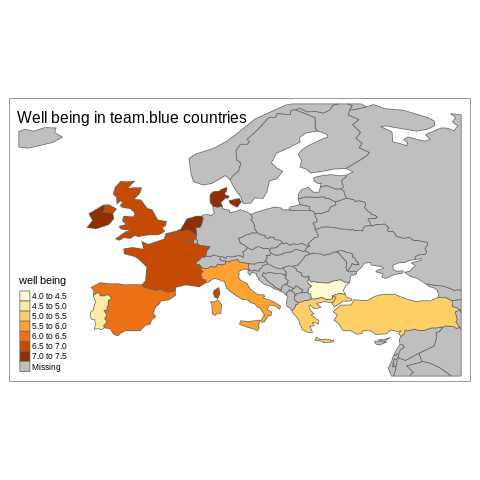

In [10]:
%%R
library(tmap)
data("World")
bbox <-  rbind(
    c(-20, 30),
    c( 45, 30),
    c( 45, 70),
    c(-20, 70),
    c(-20, 30)) %>%
  list() %>%    
  st_polygon() %>% 
  st_sfc() %>% st_sf(geometry = .) %>% 
  st_set_crs(st_crs(World))

tb <- c("Belgium", "Netherlands", "Denmark", "Italy", "United Kingdom", "Portugal", "Spain", "France", "Ireland", "Bulgaria", "Turkey", "Greece")

World %>% filter(continent %in% c("Europe", "Asia")) %>%
st_intersection(bbox) %>%
  mutate(well_being = ifelse(name %in% tb, well_being, NA)) %>%
  tm_shape() +
  tm_polygons("well_being", title = "well being") +
  tm_layout("Well being in team.blue countries",
          legend.position = c("left","bottom"))

In [11]:
%%R
df <- c('id, address, x, y
tb1, "Skaldenstraat 121 9042 Gent Belgium", 3.7869363, 51.1136713
tb2, "Vondellaan 47 2332AA Leiden The Netherlands", 4.4739336, 52.163032
tb3, "Højvangen 4 8660 Skanderborg Denmark", 9.943133, 56.048203
tb4, "Viale della Giovine Italia 17 50122 Firenze Italy", 11.267943, 43.7698819
tb5, "Acton House Perdiswell Park Worcester WR3 7GD UK", -2.2176819, 52.2172936
tb6, "Edifício Escritórios do Tejo Rua do Pólo Sul Nº 2 – 3ºB-1 Parque Expo 1990-273 Lisboa Portugal", -9.0993092, 38.7619063
tb7, "c/ Josep Pla 2 – Diagonal Litoral Towers Edificio B3planta 3-D – 08019 Barcelona Spain", 2.2158157, 41.4075828
tb8, "12-14 Rond Point des Champs-Elysées 75008 Paris France", 2.3073231, 48.869777
tb9, "5 Fitzwilliam Square E Dublin 2 D02 R744 Ireland", -6.2526216, 53.3351492
tb10, "44A Sveti Kipriyan Street floor 4 - south Mladost 2 1799 Sofia Bulgaria", 23.3640312, 42.6434368
tb11, "36 D-r G. M. Dimitrov Blvd Sofia 1797 Bulgaria", 23.3559779, 42.663825
tb12, "Gulbahar Mah Elif Sok. No. 4 Sisli - Istanbul Turkey", 29.0020758, 41.070182
tb13, "Step C/ Forth N. Plastira 100 Vassilika Vouton Iraklio 700 13 Greece", 25.0721922, 35.3050895') %>% I() %>%
  read_csv()

mat <- df %>% select(x, y) %>% as.matrix()

locations <- st_sfc() %>% st_sf(geometry = .)
for(i in c(1:nrow(df))){
  locations <- mat[i,]  %>% st_point() %>% st_sfc() %>% st_sf(geometry = .) %>% 
  mutate(label = df$address[i] ) %>% bind_rows(locations)
}


locations <- locations %>% st_set_crs(st_crs("EPSG:4326"))

st_write(locations, "/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/locations.shp", append=FALSE)




Rows: 13 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): id, address
dbl (2): x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Writing layer `locations' to data source 
  `/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/locations.shp' using driver `ESRI Shapefile'
Writing 13 features with 1 fields and geometry type Point.


In [16]:
%%R
team.blue.locations = st_read("/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/locations.shp") 
team.blue.locations
m = mapview(x = team.blue.locations)
mapshot(m, url =  "/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/map.html")

Reading layer `locations' from data source 
  `/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/locations.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 13 features and 1 field
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -9.099309 ymin: 35.30509 xmax: 29.00208 ymax: 56.0482
CRS:           4326


In [13]:
%%R
m

  

In [86]:
%%R 
rmarkdown::render('/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-06-30/presentation/markdown.Rmd')

R[write to console]: 

processing file: markdown.Rmd



  |..                                                                    |   3%
  ordinary text without R code

  |....                                                                  |   6%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |......                                                                |   9%
  ordinary text without R code

  |........                                                              |  12%
label: unnamed-chunk-1 (with options) 
List of 2
 $ echo: logi TRUE
 $ eval: logi FALSE

  |...........                                                           |  15%
  ordinary text without R code

  |.............                                                         |  18%
label: unnamed-chunk-2 (with options) 
List of 1
 $ echo: logi FALSE

  |...............                                                       |  21%
  ordinary text without R code

  |.................                                                     |  24%
label: unn

R[write to console]: output file: markdown.knit.md




/usr/bin/pandoc +RTS -K512m -RTS markdown.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output markdown.html --self-contained --wrap none --variable widescreen --variable transition=0.4 --css styles.css --template /usr/lib/R/site-library/rmarkdown/rmd/ioslides/default.html --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/Rtmp94YONA/rmarkdown-str3e469877ae.html --variable logo=logo.svg 
/usr/bin/pandoc +RTS -K512m -RTS markdown.knit.md --to ioslides_presentation.lua --from markdown+autolink_bare_uris+tex_math_single_backslash --output /tmp/Rtmp94YONA/ioslides-output3e523f34a9.html --wrap none --slide-level 2 


R[write to console]: 
Output created: markdown.html

